In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_path = './data/TravelInsurancePrediction.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.shape

(1987, 10)

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [9]:
df['TravelInsurance'] = df['TravelInsurance'].map({0: 'Not Purchased', 1: 'Purchased'})

/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_72140/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

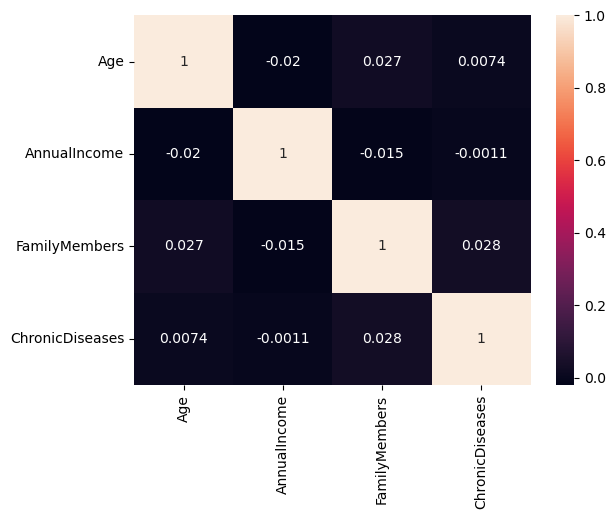

In [10]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Factor affecting Insurance: Age')

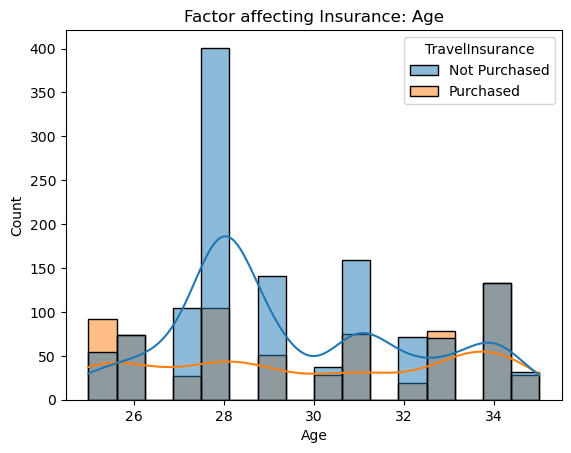

In [11]:
sns.histplot(df, x="Age",hue='TravelInsurance', kde=True)
plt.title("Factor affecting Insurance: Age")

In [12]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [13]:
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({"No":0, "Yes":1})
df['FrequentFlyer'] = df['FrequentFlyer'].map({"No": 0, "Yes": 1})
df['GraduateOrNot'] = df['GraduateOrNot'].map({"No": 0, "Yes": 1})

In [14]:
x = np.array(df[['Age', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad']])
y = np.array(df[['TravelInsurance']])

In [15]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=42)

In [16]:
# setting up model to train data
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [22]:
pred_df = pd.DataFrame(xtest, columns=['Age', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'])

In [23]:
pred_df

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,28,1,750000,5,1,0,0
1,26,1,1400000,4,1,0,1
2,29,1,1200000,7,0,0,1
3,33,1,400000,4,1,0,0
4,34,1,1500000,3,0,1,1
...,...,...,...,...,...,...,...
194,28,1,800000,5,1,0,0
195,33,1,1000000,3,0,0,1
196,28,1,600000,3,0,0,0
197,31,1,1200000,3,0,0,0


In [24]:
pred_df['Predictions'] = ytest

In [25]:
pred_df

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Predictions
0,28,1,750000,5,1,0,0,Not Purchased
1,26,1,1400000,4,1,0,1,Purchased
2,29,1,1200000,7,0,0,1,Not Purchased
3,33,1,400000,4,1,0,0,Not Purchased
4,34,1,1500000,3,0,1,1,Purchased
...,...,...,...,...,...,...,...,...
194,28,1,800000,5,1,0,0,Purchased
195,33,1,1000000,3,0,0,1,Not Purchased
196,28,1,600000,3,0,0,0,Not Purchased
197,31,1,1200000,3,0,0,0,Not Purchased


In [26]:
print(f'model training accuracy: {model.score(xtrain, ytrain)}')
print(f'model prediction accuracy: {model.score(xtest, ytest)}')

model training accuracy: 0.9138702460850112
model prediction accuracy: 0.8190954773869347
